In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# Reading & displaying the data
df = pd.read_csv('SP_500_ESG_Risk_Ratings.csv')
df.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [4]:
df.shape

(503, 15)

In [6]:
df.describe()

,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score
count,433.000000,433.000000,433.000000,433.000000,433.000000
mean,21.422633,5.678984,6.673903,9.045035,1.896074
std,7.264458,5.339965,2.201049,3.813788,0.940748
min,7.000000,0.000000,3.000000,1.100000,0.000000
25%,16.000000,1.500000,5.000000,6.600000,1.000000
50%,21.000000,3.800000,6.000000,8.700000,2.000000
75%,26.000000,8.900000,7.700000,11.600000,2.000000
max,46.000000,25.000000,15.500000,21.000000,5.000000


In [8]:
def check(data):
    l = []
    columns = df.columns
    for col in columns:
        instances = df[col].count() #number of null entries in the current column
        dtypes = df[col].dtype  #data type of the current column
        unique = df[col].nunique() #number of unique values in the current column
        sum_null = df[col].isnull().sum() #number of NA/null values in the current column
        duplicates = df.duplicated().sum() # number of duplicated rows in the entire dataframe
        l.append([col, dtypes, instances, unique, sum_null, duplicates])
    data_check = pd.DataFrame(l, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    return data_check

data_summary = check(df)
print(data_summary)

                    column    dtype  instances  unique  sum_null  duplicates
0                   Symbol   object        503     503         0           0
1                     Name   object        503     503         0           0
2                  Address   object        501     498         2           0
3                   Sector   object        501      11         2           0
4                 Industry   object        501     114         2           0
5      Full Time Employees   object        496     398         7           0
6              Description   object        501     498         2           0
7     Total ESG Risk score  float64        433      36        70           0
8   Environment Risk Score  float64        433     134        70           0
9    Governance Risk Score  float64        433      91        70           0
10       Social Risk Score  float64        433     132        70           0
11       Controversy Level   object        403       5       100           0

In [ ]:
# Handling null values

df = df.dropna(subset=['Sector','Total ESG Risk score'])

df = df.reset_index(drop=True) # reset indexing after removing 0 values

<ipython-input-10-50994d49b652>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('PRGn')  # 'PRGn' is a colormap with purple to yellow gradient


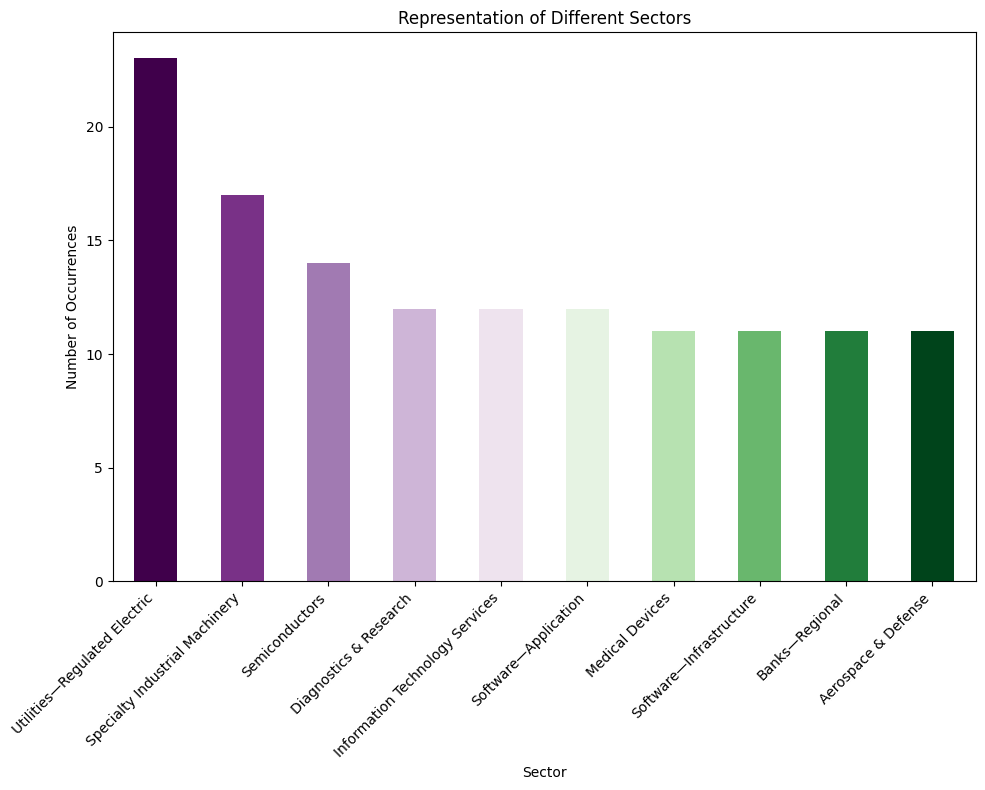

In [10]:
#How are different SECTORS represented
sector_representation = df['Sector'].value_counts().sort_values(ascending=False)

#Plot style
top_n = 10
sector_representation = df['Industry'].value_counts().nlargest(top_n)
cmap = plt.cm.get_cmap('PRGn')
colors = [cmap(i) for i in np.linspace(0, 1, top_n)]

plt.figure(figsize=(10, 8))
sector_representation.plot(kind='bar', color=colors)
plt.title('Representation of Different Sectors')
plt.ylabel('Number of Occurrences')
plt.xlabel('Sector')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

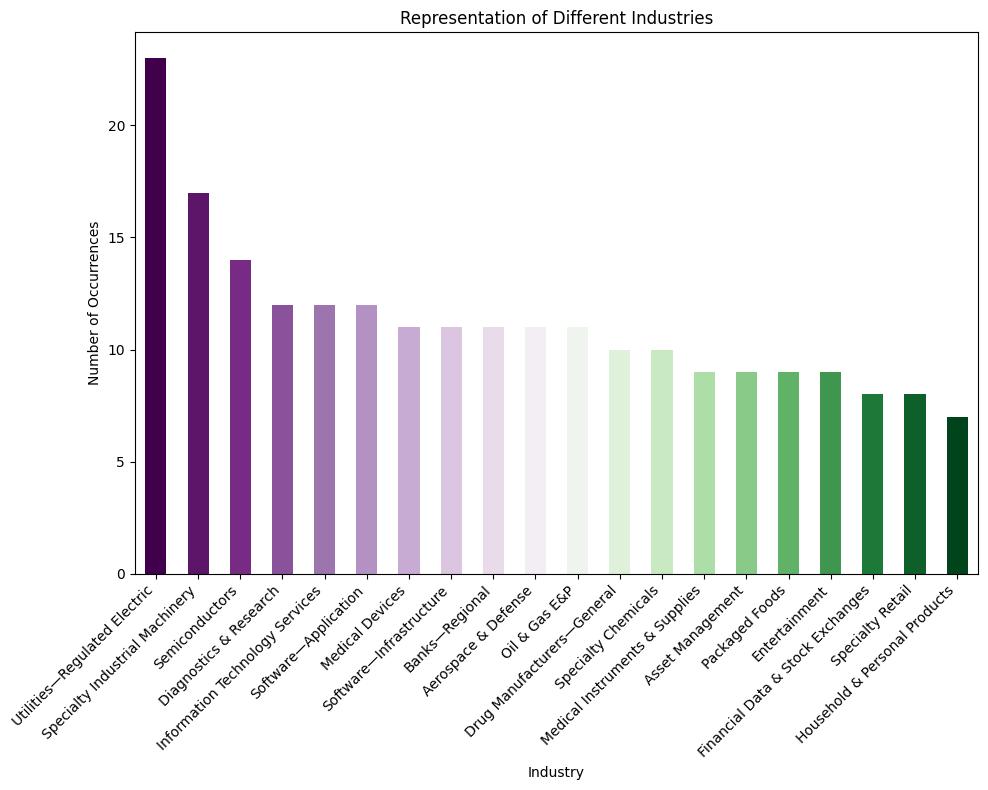

<ipython-input-13-d5900cc3c4e7>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('PRGn')  # 'PRGn' is a colormap with purple to yellow gradient


In [13]:
#How are different INDUSTRIES represented
#Top 20 Industries represented in the dataset

industry_representation = df['Industry'].value_counts().sort_values(ascending=False)

top_n = 20  # Select top 20 industries to display
industry_representation = df['Industry'].value_counts().nlargest(top_n)


plt.figure(figsize=(10, 8))
industry_representation.plot(kind='bar', color=colors)
plt.title('Representation of Different Industries')
plt.ylabel('Number of Occurrences')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot style
industry_representation = df['Industry'].value_counts().nlargest(top_n)
cmap = plt.cm.get_cmap('PRGn')  # 'PRGn' is a colormap with purple to yellow gradient
colors = [cmap(i) for i in np.linspace(0, 1, top_n)]

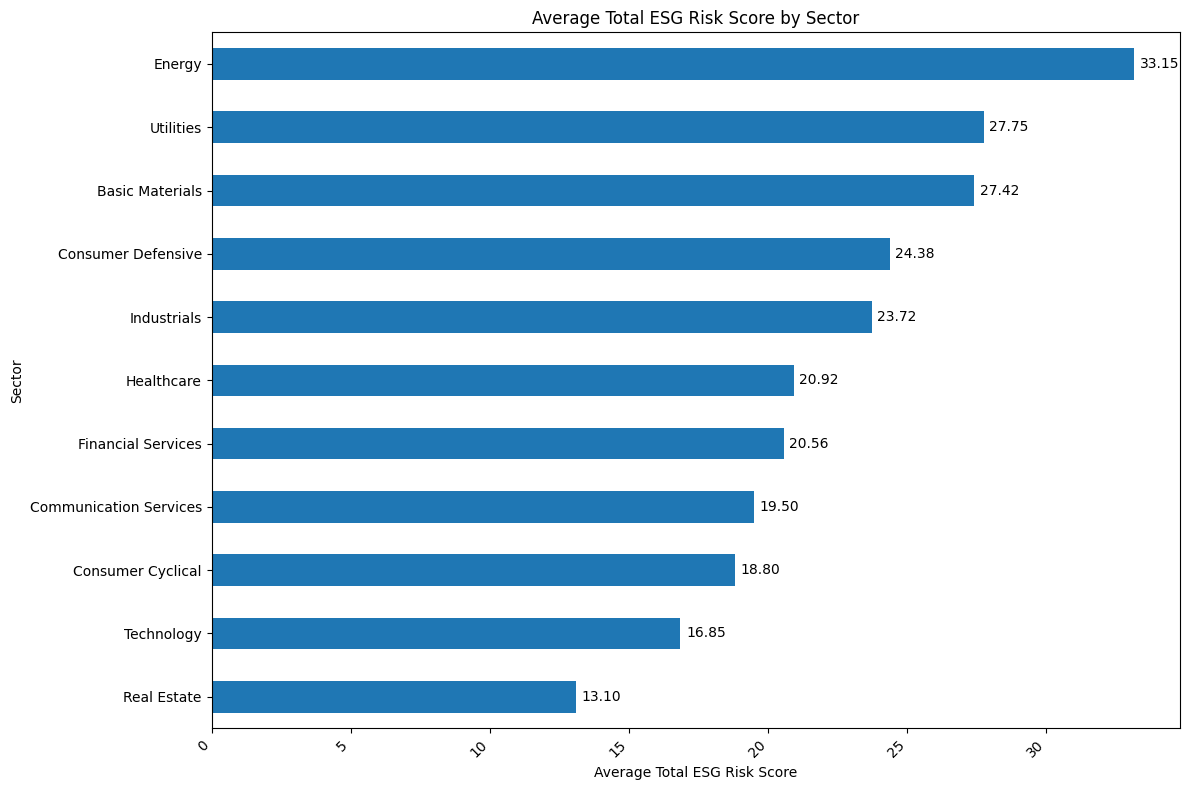

In [18]:
#How are different and sectors represented in the dataset

#Sector-wise risk

sector_risk = df.groupby('Sector')['Total ESG Risk score'].mean().sort_values()

plt.figure(figsize=(12, 8))
sector_risk.plot(kind='barh')
plt.title('Average Total ESG Risk Score by Sector')
plt.ylabel('Sector')
plt.xlabel('Average Total ESG Risk Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#add annotation
for i, v in enumerate(sector_risk):
    plt.text(v + 0.2, i, str(f"{v:.2f}"), color='black', verticalalignment='center')

plt.show()

<ipython-input-23-97f7a705ebe5>:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('summer')


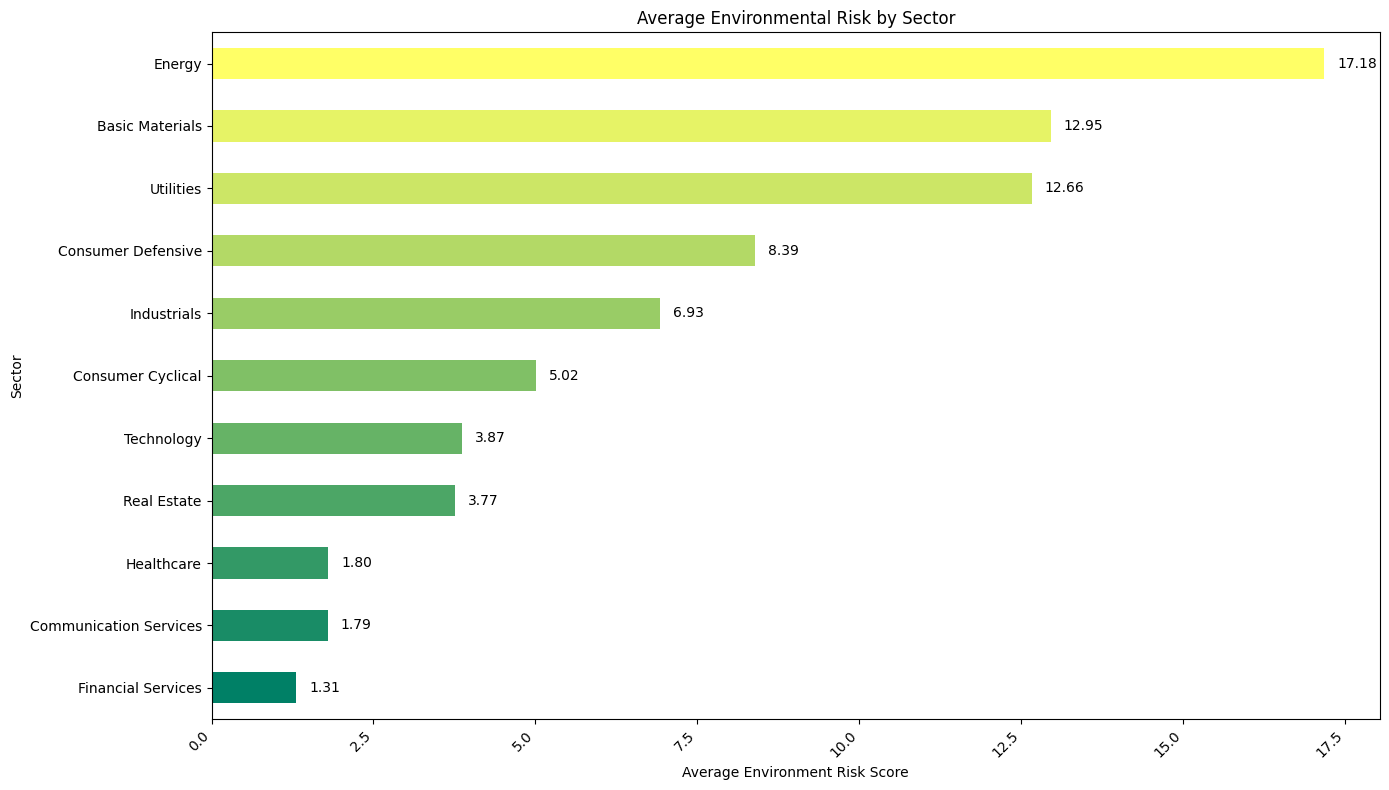

In [23]:
#Average environmental risk by Sector

#Sector-wise environmental risk

sector_env_risk = df.groupby('Sector')['Environment Risk Score'].mean().sort_values()

plt.figure(figsize=(14, 8))
sector_env_risk.plot(kind='barh', color=colors)
plt.title('Average Environmental Risk by Sector')
plt.ylabel('Sector')
plt.xlabel('Average Environment Risk Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()



#add annotation
for i, v in enumerate(sector_env_risk):
    plt.text(v + 0.2, i, str(f"{v:.2f}"), color='black', verticalalignment='center')

# Plot style
top_n = 11
sector_env_risk = df['Sector'].value_counts().nlargest(top_n)
cmap = plt.cm.get_cmap('summer')
colors = [cmap(i) for i in np.linspace(0, 1, top_n)]

plt.show()

<ipython-input-27-7dc123df5e24>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('spring')


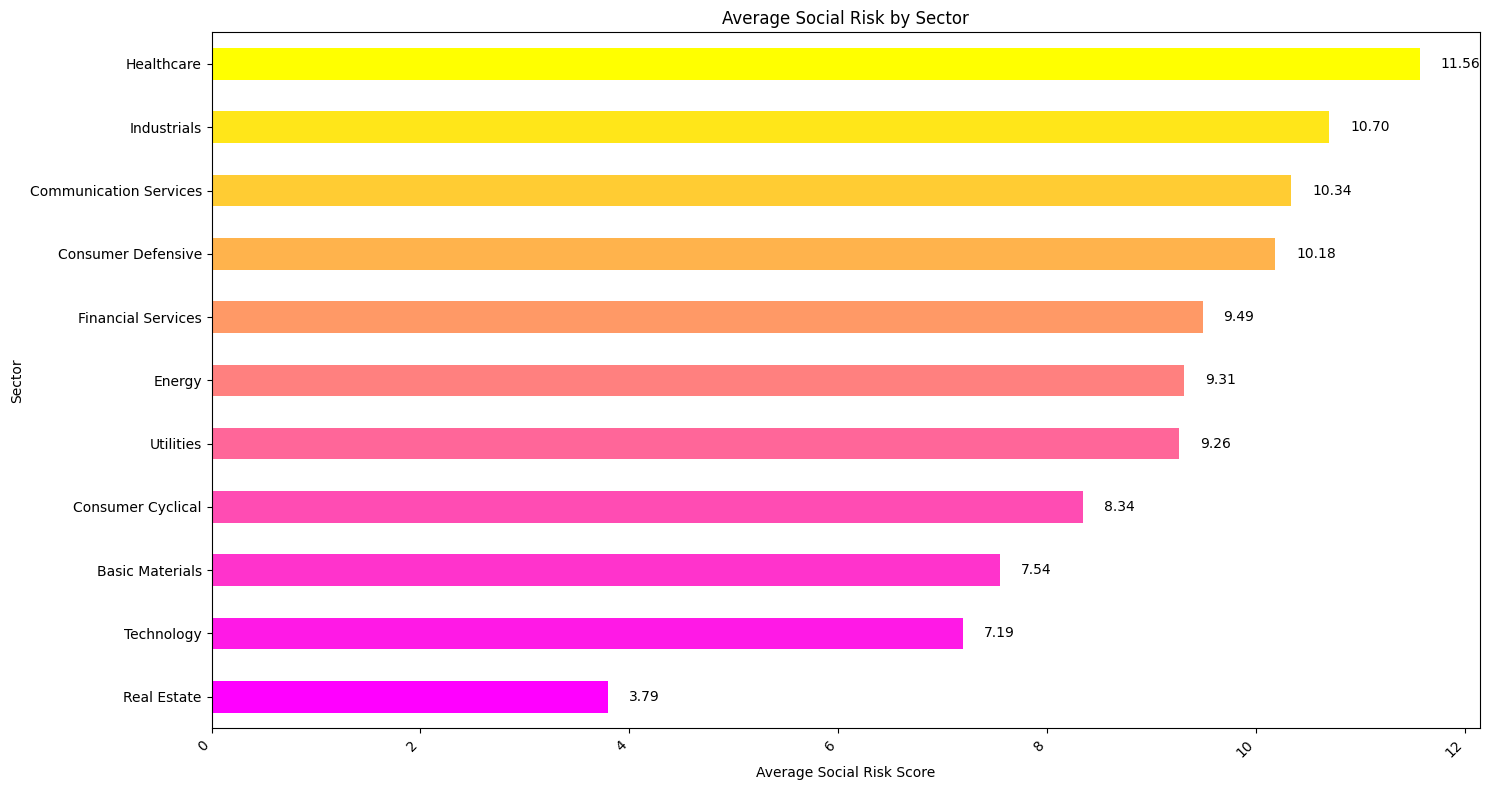

In [27]:
#Average social risk by Sector

#Sector-wise social risk

sector_soc_risk = df.groupby('Sector')['Social Risk Score'].mean().sort_values()

plt.figure(figsize=(15, 8))
sector_soc_risk.plot(kind='barh', color=colors)
plt.title('Average Social Risk by Sector')
plt.ylabel('Sector')
plt.xlabel('Average Social Risk Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#add annotation
for i, v in enumerate(sector_soc_risk):
    plt.text(v + 0.2, i, str(f"{v:.2f}"), color='black', verticalalignment='center')

# Plot style
top_n = 11
sector_soc_risk = df['Sector'].value_counts().nlargest(top_n)
cmap = plt.cm.get_cmap('spring')
colors = [cmap(i) for i in np.linspace(0, 1, top_n)]


<ipython-input-31-35a74afce322>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('winter')


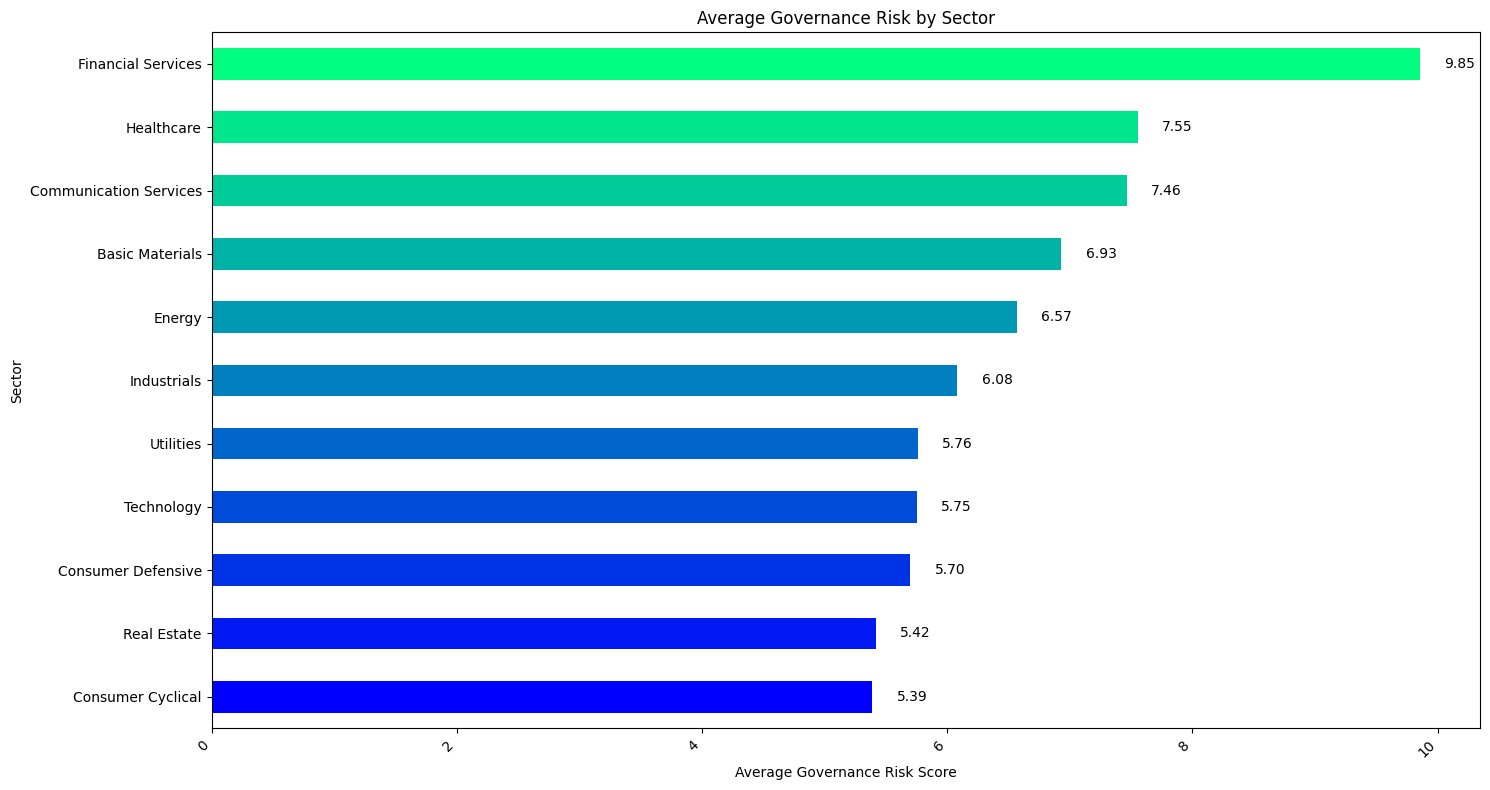

In [31]:
#Average governance risk by Sector

#Sector-wise governance risk

sector_gov_risk = df.groupby('Sector')['Governance Risk Score'].mean().sort_values()

plt.figure(figsize=(15, 8))
sector_gov_risk.plot(kind='barh', color=colors)
plt.title('Average Governance Risk by Sector')
plt.ylabel('Sector')
plt.xlabel('Average Governance Risk Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#add annotation
for i, v in enumerate(sector_gov_risk):
    plt.text(v + 0.2, i, str(f"{v:.2f}"), color='black', verticalalignment='center')

# Plot style
top_n = 11
sector_gov_risk = df['Sector'].value_counts().nlargest(top_n)
cmap = plt.cm.get_cmap('winter')
colors = [cmap(i) for i in np.linspace(0, 1, top_n)]

plt.show()

<Figure size 1000x800 with 0 Axes>

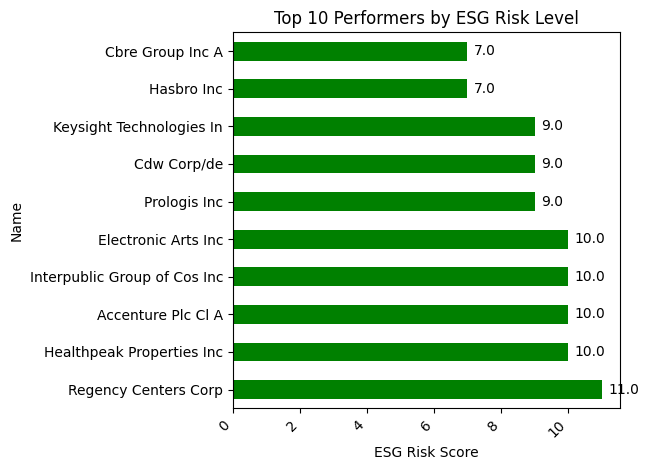

In [38]:
#Companies with the top ESC performance (=lowest ESG score)

top_score = df.sort_values(by='Total ESG Risk score', ascending=True).head(10) # 10 best companies



plt.figure(figsize=(10, 8))
top_score.plot(x='Name', y='Total ESG Risk score', kind='barh', legend=False, color='green')
plt.title('Top 10 Performers by ESG Risk Level')
plt.ylabel('Name')
plt.xlabel('ESG Risk Score')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.tight_layout()

#add annotation
for i, v in enumerate(top_score['Total ESG Risk score']):
    plt.text(v + 0.2, i, str(v), color='black', verticalalignment='center')

plt.show()

<Figure size 1000x800 with 0 Axes>

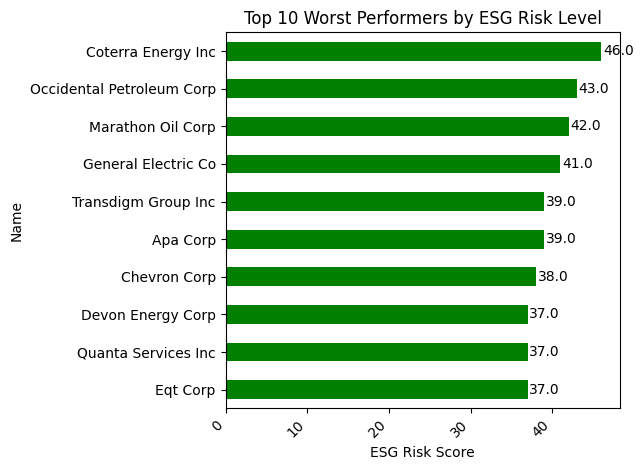

In [42]:
#Companies with the worst ESC performance (=highest ESG score)

worst_score = df.sort_values(by='Total ESG Risk score', ascending=False).head(10) # 10 worst companies

plt.figure(figsize=(10, 8))
worst_score.plot(x='Name', y='Total ESG Risk score', kind='barh', legend=False, color='green')
plt.title('Top 10 Worst Performers by ESG Risk Level')
plt.ylabel('Name')
plt.xlabel('ESG Risk Score')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.tight_layout()

#add annotation
for i, v in enumerate(worst_score['Total ESG Risk score']):
    plt.text(v + 0.2, i, str(v), color='black', verticalalignment='center')

plt.show()